# Twitter Sentiment Analysis

## Reading data

In [1]:
# import library needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

#nltk.download('stopwords') # first time installation for stopwords from nltk, comment out if done priorly

%matplotlib inline

In [2]:
# Read from file
twitter_df = pd.read_csv('train.csv', encoding = 'latin-1')
twitter_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
print(twitter_df.SentimentText.head(10))

0                         is so sad for my APL frie...
1                       I missed the New Moon trail...
2                              omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I'...
4             i think mi bf is cheating on me!!!   ...
5                    or i just worry too much?        
6                   Juuuuuuuuuuuuuuuuussssst Chillin!!
7           Sunny Again        Work Tomorrow  :-|  ...
8          handed in my uniform today . i miss you ...
9             hmmmm.... i wonder how she my number @-)
Name: SentimentText, dtype: object


In [4]:
# Add a new row/attribute of length
twitter_df['Length'] = twitter_df['SentimentText'].apply(len)
twitter_df.head()

,ItemID,Sentiment,SentimentText,Length
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


count    99989.000000
mean        77.264309
std         36.382639
min          6.000000
25%         47.000000
50%         73.000000
75%        108.000000
max        949.000000
Name: Length, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x2925eddf780>,
 'caps': [<matplotlib.lines.Line2D at 0x2925eddfe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2925eddf358>],
 'medians': [<matplotlib.lines.Line2D at 0x2925edf54e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2925edf5828>],
 'means': []}

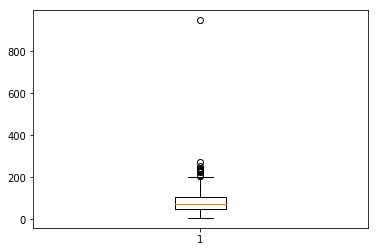

In [5]:
print(twitter_df['Length'].describe())
plt.boxplot(twitter_df.Length)

## Data Cleaning

{'whiskers': [<matplotlib.lines.Line2D at 0x2925ee6ef28>,
 'caps': [<matplotlib.lines.Line2D at 0x2925ee3c5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2925ee6eb38>],
 'medians': [<matplotlib.lines.Line2D at 0x2925ee3cc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2925ee3cfd0>],
 'means': []}

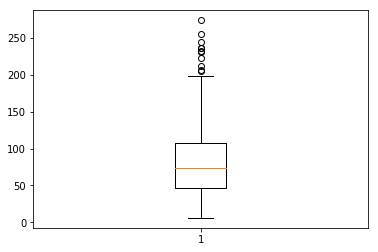

In [6]:
# Drop any invalid tweet with length more that 280
invalidTweet = twitter_df[ twitter_df.Length > 280].index # get the index of invalid tweet with length more than 280
twitter_df = twitter_df.drop(invalidTweet)
twitter_df.reset_index(drop=True,inplace=True) # Reset index
plt.boxplot(twitter_df.Length)

In [7]:
# Define data cleaning function
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [8]:
clean_tweet_texts = []
for i in range(0,len(twitter_df)):
    if( (i+1) % 10000 == 0):
        print("10000 processed")
    clean_tweet_texts.append(tweet_cleaner(twitter_df['SentimentText'][i]))
print("Process completed")

C:\Users\Fats\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


10000 processed
10000 processed
10000 processed
10000 processed
10000 processed
10000 processed
10000 processed
10000 processed
10000 processed
Process completed


In [9]:
# Save cleaned data into csv
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = twitter_df.Sentiment
clean_df.to_csv('clean_tweet.csv')

## Text pre-processing

In [10]:
cleanTwitter_df = pd.read_csv('clean_tweet.csv',index_col=0)
cleanTwitter_df.dropna(inplace=True)
cleanTwitter_df.reset_index(drop=True,inplace=True) # Reset index
cleanTwitter_df.head(5)

,text,target
0,is so sad for my apl friend,0
1,i missed the new moon trailer,0
2,omg its already o,1
3,omgaga im sooo im gunna cry i ve been at this ...,0
4,i think mi bf is cheating on me t t,0


In [11]:
import csv
def translator(text):
    text = text.split(" ")
    j = 0
    for word in text:
        with open("translate.txt","r") as translateFile:
            # reading file as CSV with delimter "=", abbreviation stored in row[0], phrase in row[1]
            dataFromFile = csv.reader(translateFile, delimiter= "=")
            for row in dataFromFile:
                # check if selected word matches short forms[LHS] in text file
                if word.upper() == row[0]:
                    # if match, replace with phrase[RHS]
                    text[j] = row[1].lower()
            translateFile.close();
        j = j + 1

    return ' '.join(text)

In [12]:
# nopunc.split() will be like ['Sample', 'message', 'is' , 'hi']
def text_process(mess):
    # Check characters to see if they are in punctuation
    # if char is not in string.punctuation(a library) then nopunc = that char
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    #Convert slangs or short form
    noshortform = translator(nopunc) # call the translator function
        
    # Now just remove any stopwords
    return [word for word in noshortform.split() if word.lower() not in stopwords.words('english')]

In [13]:
# For visualization, the first 5 is now tokenized with punctuation and stopwords removed
from nltk.corpus import stopwords
print(cleanTwitter_df['text'].head(10))
print("\n\n---------------------compare---------------\n\n")
print(cleanTwitter_df['text'].head(10).apply(text_process))

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                                    omg its already o
3    omgaga im sooo im gunna cry i ve been at this ...
4                  i think mi bf is cheating on me t t
5                             or i just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                 sunny again work tomorrow tv tonight
8        handed in my uniform today i miss you already
9                     hmmmm i wonder how she my number
Name: text, dtype: object


---------------------compare---------------


0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                   [oh, god, already]
3    [omgaga, sooo, gunna, cry, dentist, since, sup...
4                                [think, bf, cheating]
5                                        [worry, much]
6                  [juuuuuuuuuuuuuuuuussssst, 

## Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#bow = bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(cleanTwitter_df['text'])

In [15]:
# for visualiztion of count vector
message2 = cleanTwitter_df['text'][1]
print(message2 + "\n")
print(cleanTwitter_df['text'].head(5).apply(text_process))

bow4 = bow_transformer.transform([message2])
print(bow4)

i missed the new moon trailer

0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                   [oh, god, already]
3    [omgaga, sooo, gunna, cry, dentist, since, sup...
4                                [think, bf, cheating]
Name: text, dtype: object
  (0, 29320)	1
  (0, 29770)	1
  (0, 31070)	1
  (0, 46570)	1


In [16]:
text_bow = bow_transformer.transform(cleanTwitter_df['text'])

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_bow)
# transform entire bag of words into TF-IDF
text_tfidf = tfidf_transformer.transform(text_bow)

## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(text_tfidf,cleanTwitter_df['target'])

## Evaluate Model

In [ ]:
all_predictions = sentiment_detect_model.predict(text_tfidf)
print(all_predictions)

[0 1 0 ... 1 1 1]


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(cleanTwitter_df['target'], all_predictions))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77     43364
           1       0.80      0.91      0.85     56247

   micro avg       0.82      0.82      0.82     99611
   macro avg       0.83      0.81      0.81     99611
weighted avg       0.83      0.82      0.82     99611



## Data pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

Text_train, Text_test , Sentiment_train, Sentiment_test = \
train_test_split(cleanTwitter_df['text'], cleanTwitter_df['target'] , test_size = 0.2)

In [ ]:
pipeline.fit(Text_train,Sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000029263C21BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [ ]:
predictions = pipeline.predict(Text_test)

### Train Test split validation

In [ ]:
print( classification_report(predictions,Sentiment_test))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65      6549
           1       0.85      0.72      0.78     13374

   micro avg       0.73      0.73      0.73     19923
   macro avg       0.71      0.74      0.71     19923
weighted avg       0.76      0.73      0.74     19923



### K-Fold Cross validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True)

# X = Text (message "Hi how are you")
# Y = target sentiment 0,1

iteration = 1
for train_index ,test_index in kf.split(cleanTwitter_df):
    X_train, X_test, Y_train, Y_test = cleanTwitter_df.text[train_index], cleanTwitter_df.text[test_index], \
    cleanTwitter_df.target[train_index],cleanTwitter_df.target[test_index]
    pipeline.fit(X_train,Y_train) # use training set 
    
    predictions = pipeline.predict(X_test)
    print("Iteration ", iteration )
    print(classification_report(predictions,Y_test))
    print("--------------------------------" )
    
    iteration = iteration +1

Iteration  1
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      3191
           1       0.87      0.73      0.79      6771

   micro avg       0.74      0.74      0.74      9962
   macro avg       0.72      0.75      0.72      9962
weighted avg       0.77      0.74      0.75      9962

--------------------------------
Iteration  2
              precision    recall  f1-score   support

           0       0.57      0.76      0.65      3304
           1       0.85      0.71      0.78      6657

   micro avg       0.73      0.73      0.73      9961
   macro avg       0.71      0.73      0.71      9961
weighted avg       0.76      0.73      0.73      9961

--------------------------------
Iteration  3
              precision    recall  f1-score   support

           0       0.57      0.76      0.65      3202
           1       0.87      0.72      0.79      6759

   micro avg       0.74      0.74      0.74      9961
   macro avg       0.72